# Predicting Future Stock Prices (Short-Term) 
Using historical data to predict the next day's closing price.

In [ ]:
#Importing libraries
import pandas as pd
import yfinance as yf
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

## Preparing the Dataset

### Loading stock data

In [1]:
import yfinance as yf
from datetime import datetime

# Fetch Tesla stock data
end_date = datetime.today().strftime('%Y-%m-%d')  # Use today's date as the end date
data = yf.download('TSLA', start='2022-01-01', end=end_date)
print(data.head())

C:\Users\fahad\AppData\Local\Temp\ipykernel_13488\4222616146.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download('TSLA', start='2022-01-01', end=end_date)
[*********************100%***********************]  1 of 1 completed

Price            Close        High         Low        Open     Volume
Ticker            TSLA        TSLA        TSLA        TSLA       TSLA
Date                                                                 
2022-01-03  399.926666  400.356659  378.679993  382.583344  103931400
2022-01-04  383.196655  402.666656  374.350006  396.516663  100248300
2022-01-05  362.706665  390.113342  360.336670  382.216675   80119800
2022-01-06  354.899994  362.666656  340.166656  359.000000   90336600
2022-01-07  342.320007  360.309998  336.666656  360.123322   84164700


### Checking the basic info about the dataset

In [3]:
print("Shape of the dataset:", data.shape)  #Shape of dataset

print("Columns:", data.columns.tolist())  #Column names

data.info()  #Information about dataset

data.describe()  #Statistical summary

Shape of the dataset: (870, 5)
Columns: [('Close', 'TSLA'), ('High', 'TSLA'), ('Low', 'TSLA'), ('Open', 'TSLA'), ('Volume', 'TSLA')]
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 870 entries, 2022-01-03 to 2025-06-23
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, TSLA)   870 non-null    float64
 1   (High, TSLA)    870 non-null    float64
 2   (Low, TSLA)     870 non-null    float64
 3   (Open, TSLA)    870 non-null    float64
 4   (Volume, TSLA)  870 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 40.8 KB


Price,Close,High,Low,Open,Volume
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA
count,870.000000,870.000000,870.000000,870.000000,8.700000e+02
mean,247.770061,253.724444,241.817950,247.975774,1.068518e+08
std,66.473878,68.378837,64.751693,66.830922,3.970185e+07
min,108.099998,111.750000,101.809998,103.000000,3.716760e+07
25%,196.070000,199.272495,191.484997,195.610001,7.799242e+07
50%,240.669998,247.050003,235.350006,241.924995,9.971820e+07
75%,284.820007,291.467491,277.058327,283.834167,1.264569e+08
max,479.859985,488.540009,457.510010,475.899994,3.065906e+08


### Checking for missing values

In [2]:
data.isnull().sum()

Price   Ticker
Close   TSLA      0
High    TSLA      0
Low     TSLA      0
Open    TSLA      0
Volume  TSLA      0
dtype: int64

## Building a Random Forest Model for Stock Price Prediction

### Splitting the dataset into train and test datasets

In [4]:
from sklearn.model_selection import train_test_split
# Selecting features and target variable
X = data[['Open', 'High', 'Low', 'Volume']] # Features
y = data['Close'] # Target variable
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Training the Random Forest Model

In [5]:
from sklearn.ensemble import RandomForestRegressor
# Initializing and training the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
# Predicting on the test set
y_pred = rf_model.predict(X_test)

d:\internship'25\.venv\Lib\site-packages\sklearn\base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


### Evaluating Model Performance


In [6]:
from sklearn.metrics import mean_squared_error, r2_score
# Calculating metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 26.56960333634094
R-squared: 0.9940870541989301


### Visualization of Prediction

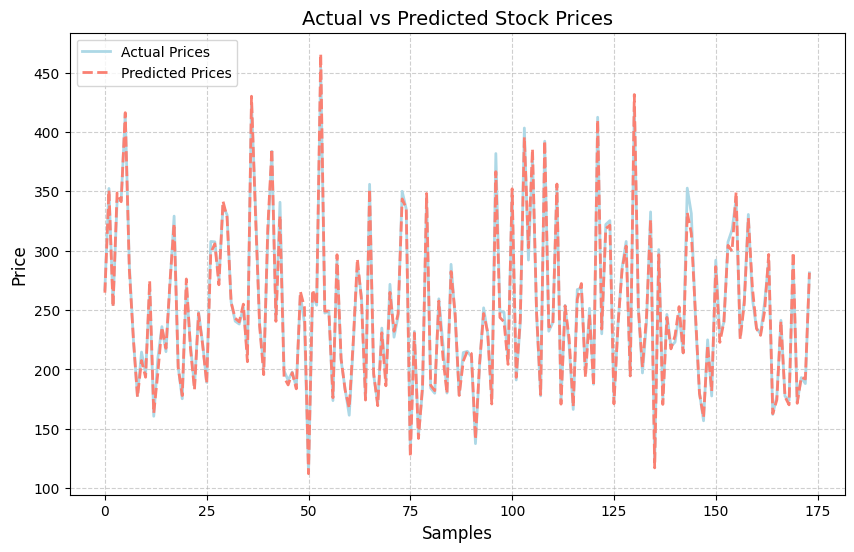

In [11]:
import matplotlib.pyplot as plt

# Plotting actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual Prices', color='lightblue', linewidth=2)  # Blue for actual prices
plt.plot(y_pred, label='Predicted Prices', color='salmon', linestyle='--', linewidth=2)  # Green for predicted prices
plt.legend(loc='upper left')  # Adjust legend position
plt.title('Actual vs Predicted Stock Prices', fontsize=14)
plt.xlabel('Samples', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)  # Add a grid for better readability
plt.show()

### Conclusion
Using the Random Forest algorithm with Yfinance, offers a powerful solution for stock price prediction. While challenges exist, its ability to process complex datasets and provide feature insights makes it a strong tool for financial analysts. 